In [5]:
from shapely import wkt
from shapely.geometry import Point
from shapely.geometry import mapping
from pyproj import Transformer
import geopandas as gpd
import pandas as pd
import requests

C:\Users\samuelms\AppData\Roaming\Python\Python39\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\samuelms\AppData\Local\Temp\ipykernel_1224\3399898767.py:5: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be sm

Dropdown(description='Year:', index=2, options=(2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 20…

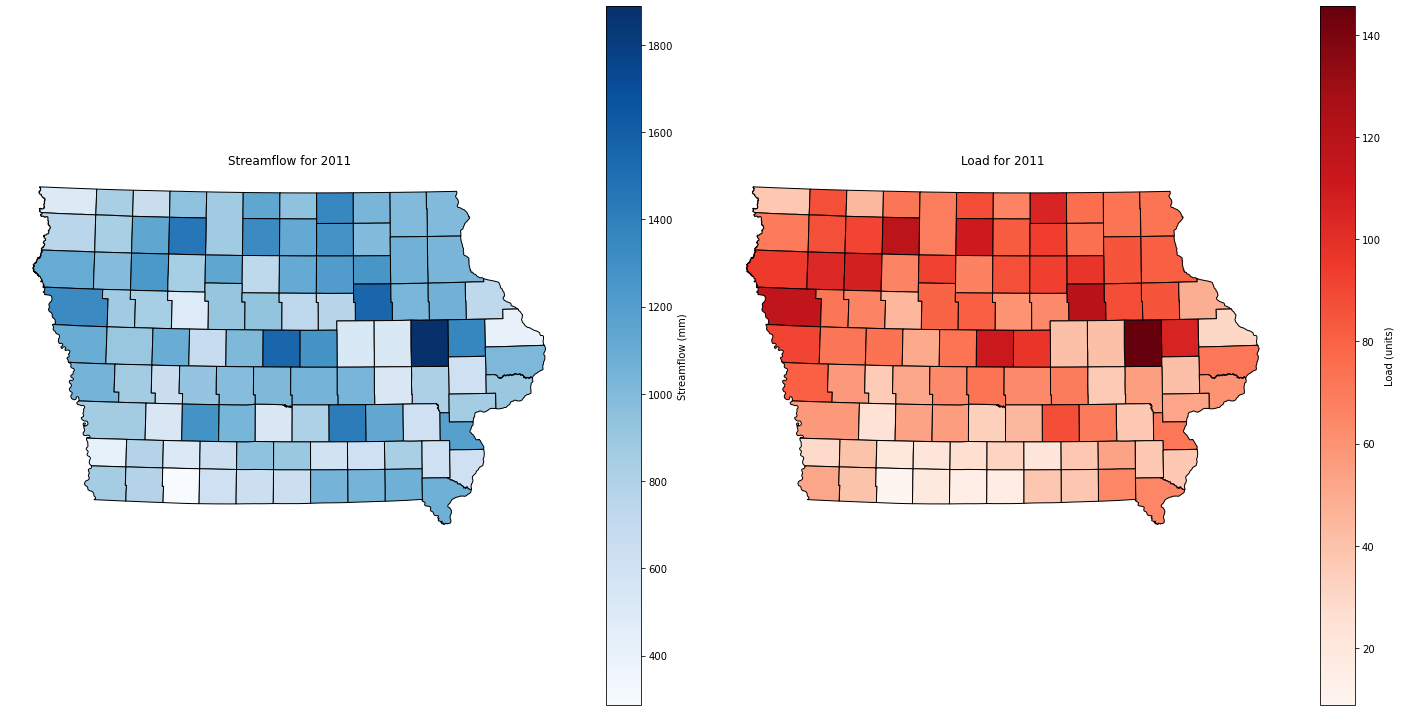

In [9]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
import geopandas as gpd


# Load the yearly data
counties_with_flow_yearly = pd.read_csv('counties_with_flow_yearly.csv')  # Yearly streamflow
counties_with_load = pd.read_csv('counties_with_load_yearly.csv')  # Yearly load

# Ensure no NaN values and convert types
counties_with_flow_yearly = counties_with_flow_yearly.dropna(subset=['Year'])
counties_with_flow_yearly['Year'] = counties_with_flow_yearly['Year'].astype(int)

counties_with_load = counties_with_load.dropna(subset=['Year'])
counties_with_load['Year'] = counties_with_load['Year'].astype(int)

# Explicitly convert WKT strings in 'geometry' column to shapely geometry objects
counties_with_flow_yearly['geometry'] = counties_with_flow_yearly['geometry'].apply(wkt.loads)
counties_with_load['geometry'] = counties_with_load['geometry'].apply(wkt.loads)

# Create GeoDataFrames using the explicitly converted geometry column
counties_with_flow_yearly = gpd.GeoDataFrame(
    counties_with_flow_yearly,
    geometry='geometry'
)

counties_with_load = gpd.GeoDataFrame(
    counties_with_load,
    geometry='geometry'
)

# Widget for Year
year_widget = widgets.Dropdown(
    options=sorted(counties_with_flow_yearly['Year'].unique()),
    value=sorted(counties_with_flow_yearly['Year'].unique())[0],
    description='Year:',
)

def plot_maps(year):
    """
    Function to plot two maps side by side: Streamflow on the left, Load on the right.
    """
    # Filter data for the selected year
    flow_data = counties_with_flow_yearly[counties_with_flow_yearly['Year'] == year]
    load_data = counties_with_load[counties_with_load['Year'] == year]

    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    # Plot Streamflow map on the left
    flow_data.plot(ax=ax1, column='total_streamflow', cmap='Blues', legend=True,
                   edgecolor='black', legend_kwds={'label': "Streamflow (mm)"})
    ax1.set_title(f'Streamflow for {year}')
    ax1.set_axis_off()

    # Plot Load map on the right
    load_data.plot(ax=ax2, column='loading_kgha', cmap='Reds', legend=True,
                   edgecolor='black', legend_kwds={'label': "Load (units)"})
    ax2.set_title(f'Load for {year}')
    ax2.set_axis_off()

    plt.tight_layout()
    plt.show()

def on_value_change(change):
    """
    Handler function for when the year widget selection changes.
    """
    clear_output(wait=True)
    display(year_widget)
    plot_maps(year_widget.value)

# Bind the handler to the widget
year_widget.observe(on_value_change, names='value')

# Display the initial setup
display(year_widget)
plot_maps(year_widget.value)